In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

k = pd.read_csv('K.csv')
k.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,4.984375,5.562500,4.812500,5.515625,1.921917,17046400
1,1985-02-01,5.500000,6.000000,5.359375,5.968750,2.079809,11101600
2,1985-03-01,5.953125,6.281250,5.781250,6.218750,2.187021,9357600
3,1985-04-01,6.156250,6.203125,5.734375,5.968750,2.099100,12930400
4,1985-05-01,5.984375,7.359375,5.765625,7.281250,2.560682,17680000


/tmp/ipykernel_19731/97381107.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(signal, freq=freq, model="multiplicative")


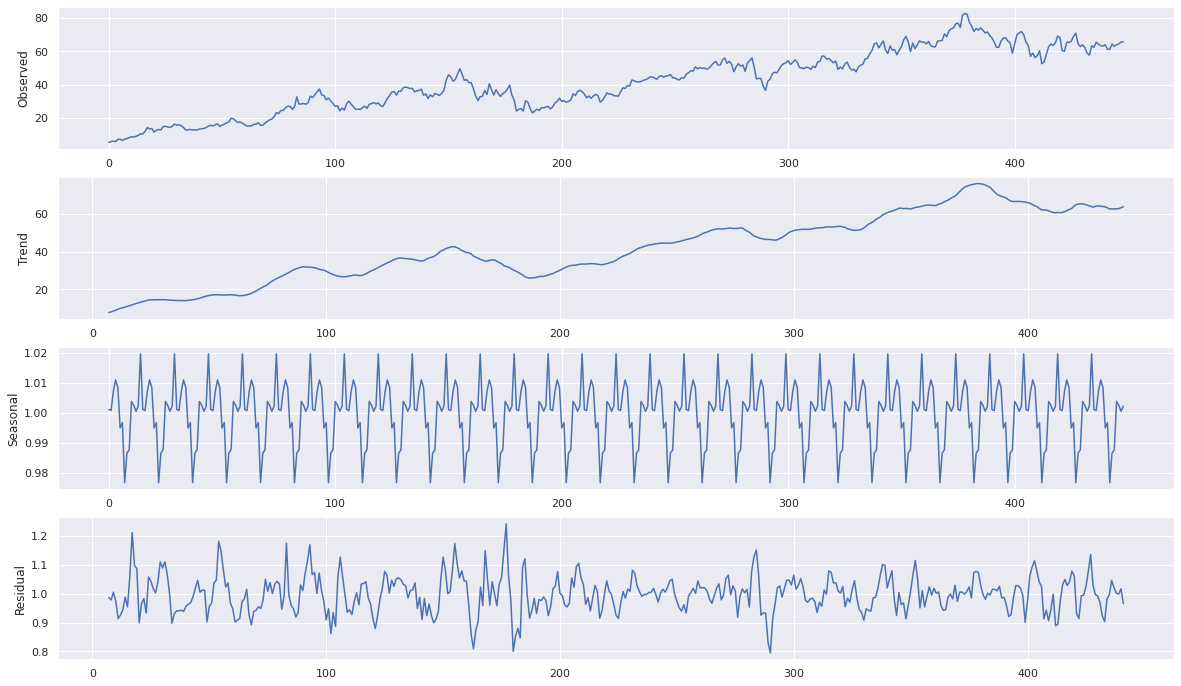

In [2]:
import statsmodels.api as sm

# multiplicative
freq = 15
signal = k.Close.values
res = sm.tsa.seasonal_decompose(signal, freq=freq, model="multiplicative")
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(20, 12))
ax1.plot(res.observed)
ax1.set_ylabel('Observed')
ax2.plot(res.trend)
ax2.set_ylabel('Trend')
ax3.plot(res.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(res.resid)
ax4.set_ylabel('Residual')
plt.show()

In [3]:
def removal(signal, repeat):
    copy_signal = np.copy(signal)
    for j in range(repeat):
        for i in range(3, len(signal)):
            copy_signal[i - 1] = (copy_signal[i - 2] + copy_signal[i]) / 2
    return copy_signal

def get(original_signal, removed_signal):
    buffer = []
    for i in range(len(removed_signal)):
        buffer.append(original_signal[i] - removed_signal[i])
    return np.array(buffer)

removed_signal = removal(signal, 30)
noise = get(signal, removed_signal)


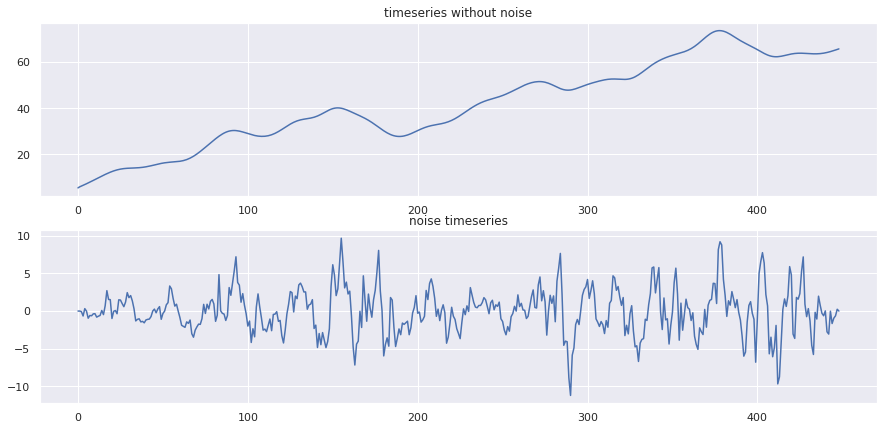

In [6]:
## Residual

plt.figure(figsize=(15, 7))
plt.subplot(2, 1, 1)
plt.plot(removed_signal)
plt.title('timeseries without noise')
plt.subplot(2, 1, 2)
plt.plot(noise)
plt.title('noise timeseries')
plt.show()

In [7]:
## Trend

kernel = np.array([1] * freq) / freq
kernel

stride = 1
t_range = int((signal.shape[0] - freq) / stride + 1)
output_conv = np.zeros((t_range))
for i in range(t_range):
    sum_val = np.sum(signal[i * stride:i * stride + freq] * kernel)
    output_conv[i] = sum_val

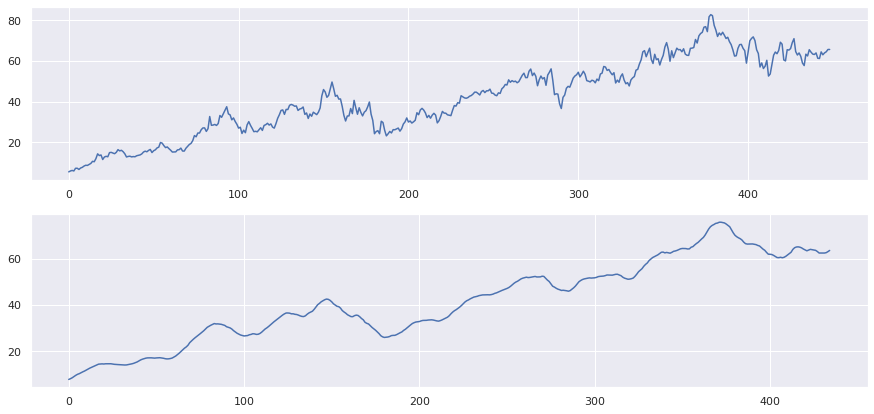

In [8]:
plt.figure(figsize=(15, 7))
plt.subplot(2,1,1)
plt.plot(signal)
plt.subplot(2,1,2)
plt.plot(output_conv)
plt.show()

In [9]:
## Seasonal

trended = signal[:t_range] / output_conv
def seasonal_mean(x, freq):
    return np.array([np.nanmean(x[i::freq]) for i in range(freq)])

period_averages = seasonal_mean(trended, freq)
period_averages /= period_averages.mean()
period_averages

array([0.99629746, 0.99500243, 1.00100986, 1.00496251, 1.0071828 ,
       0.99390508, 0.99452751, 0.97705994, 0.98755603, 0.98939271,
       1.0072637 , 1.00738377, 1.00619934, 1.0076944 , 1.02456245])

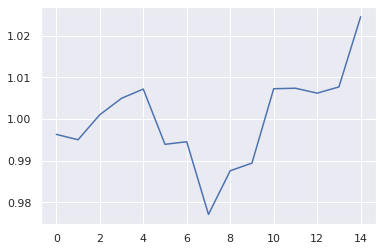

In [10]:
plt.plot(period_averages)
plt.show()

In [11]:
signal[8::8]

array([ 7.75    , 12.03125 , 14.96875 , 15.4375  , 13.4375  , 16.53125 ,
       18.40625 , 16.3125  , 19.5     , 27.09375 , 29.25    , 31.0625  ,
       24.75    , 26.1875  , 27.5     , 36.1875  , 36.375   , 34.8125  ,
       42.125   , 41.3125  , 40.625   , 37.4375  , 30.375   , 26.200001,
       30.      , 36.700001, 33.400002, 33.349998, 42.400002, 44.639999,
       46.130001, 47.099998, 49.27    , 56.      , 51.810001, 43.689999,
       49.23    , 53.43    , 50.299999, 53.189999, 48.779999, 58.5     ,
       58.73    , 68.980003, 65.580002, 66.550003, 74.370003, 72.709999,
       62.369999, 64.389999, 59.009998, 64.349998, 65.309998, 58.939999,
       63.919998, 65.610001])

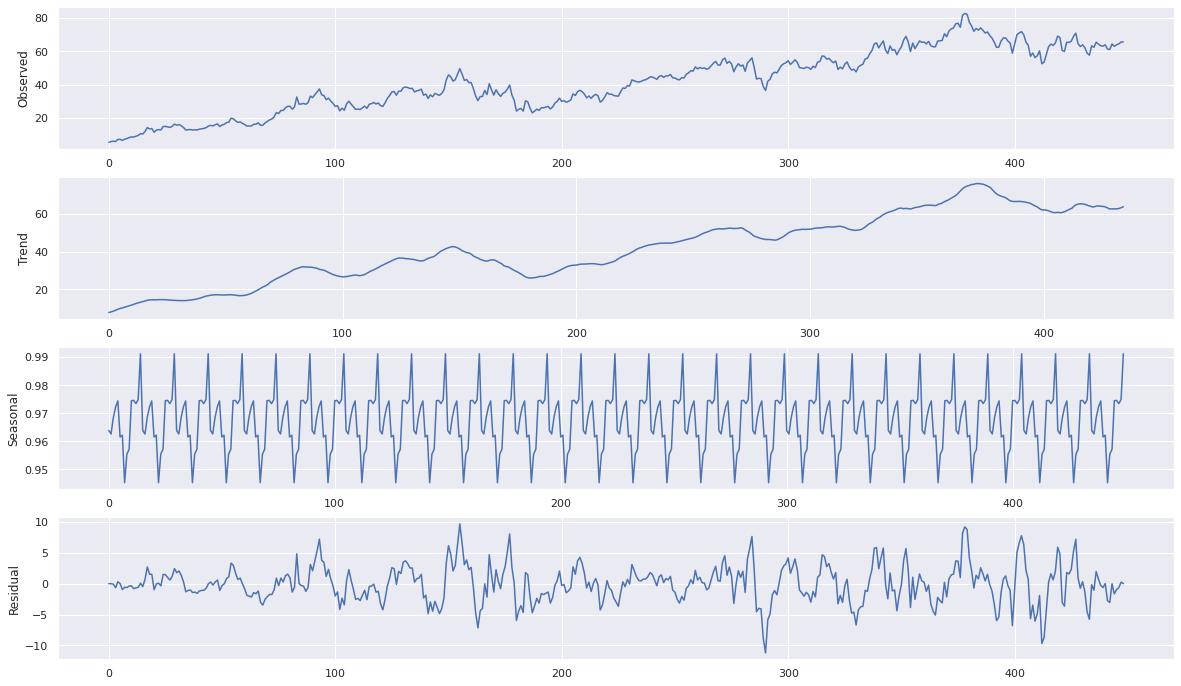

In [12]:
seasonal = np.tile(seasonal_mean(trended, freq), len(signal) // freq + 1)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(20, 12))
ax1.plot(signal)
ax1.set_ylabel('Observed')
ax2.plot(output_conv)
ax2.set_ylabel('Trend')
ax3.plot(seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(noise)
ax4.set_ylabel('Residual')
plt.show()
